# Detailed analysis of Test Data and its Model Evaluation 

In [2]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

# For inline plotting in notebooks
%matplotlib inline

### Exploratory Data Analysis

#### Define Dataset Path and Basic Information

In [3]:
# Define the path to your dataset (folder structure: dataset -> classes -> images)
data_dir = 'SLangDataset/new_Blmark_data_combined'

# Get the list of class directories
classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
print("Classes found:", classes)

Classes found: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'HI', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'Space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


#### Analyze Class Distribution
Here, we count the number of images per class and plot the distribution.

Number of images per class:
A: 4000
B: 4000
C: 4000
D: 4000
E: 4000
F: 4000
G: 4000
H: 4000
HI: 4000
I: 4000
J: 4000
K: 4000
L: 4000
M: 4000
N: 4000
O: 4000
P: 4000
Q: 4000
R: 4000
S: 4000
Space: 4000
T: 4000
U: 4000
V: 4000
W: 4000
X: 4000
Y: 4000
Z: 4000


C:\Users\User\AppData\Local\Temp\ipykernel_1392\1994707946.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")


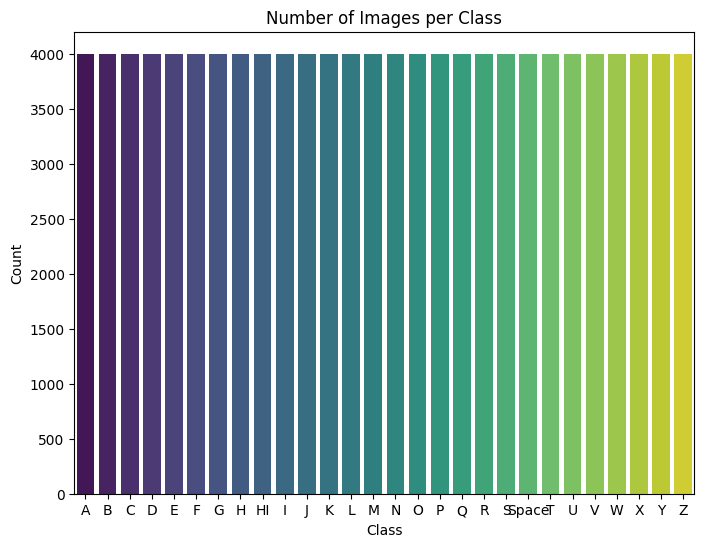

Total number of classes: 28
Total number of images: 112000


In [4]:
# Count images per class
class_counts = {}
for cl in classes:
    cl_path = os.path.join(data_dir, cl)
    # Considering common image formats
    images = [f for f in os.listdir(cl_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    class_counts[cl] = len(images)

# Display the counts
print("Number of images per class:")
for cl, count in class_counts.items():
    print(f"{cl}: {count}")

# Bar plot for class distribution
plt.figure(figsize=(8,6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")
plt.title("Number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Total images and classes
total_images = sum(class_counts.values())
print(f"Total number of classes: {len(classes)}")
print(f"Total number of images: {total_images}")


####  Visualize Sample Images from Each Class
This cell picks a random image from each class and displays them.

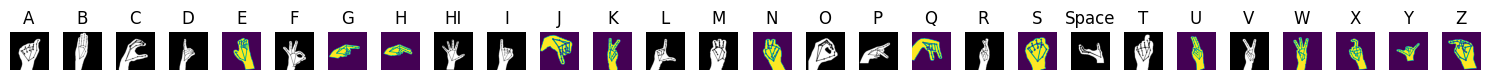

In [5]:
plt.figure(figsize=(15,5))
for i, cl in enumerate(classes):
    cl_path = os.path.join(data_dir, cl)
    images = [f for f in os.listdir(cl_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if images:
        sample_img_name = random.choice(images)
        sample_img_path = os.path.join(cl_path, sample_img_name)
        img = Image.open(sample_img_path)
        
        plt.subplot(1, len(classes), i+1)
        plt.imshow(img)
        plt.title(cl)
        plt.axis('off')
plt.tight_layout()
plt.show()


#### Analyze Image Dimensions
Here, we gather and plot the distribution of image widths and heights.

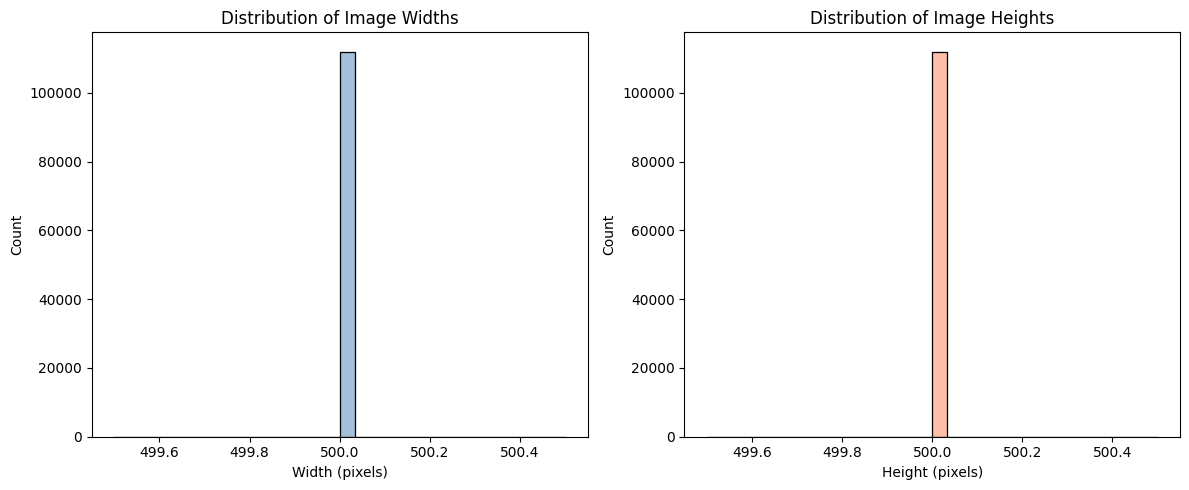

In [6]:
widths = []
heights = []

# Loop through images in each class to collect dimensions
for cl in classes:
    cl_path = os.path.join(data_dir, cl)
    images = [f for f in os.listdir(cl_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    for img_name in images:
        img_path = os.path.join(cl_path, img_name)
        try:
            with Image.open(img_path) as img:
                w, h = img.size
                widths.append(w)
                heights.append(h)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")

# Plot distribution of image widths and heights
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(widths, kde=True, bins=30, color="steelblue")
plt.title("Distribution of Image Widths")
plt.xlabel("Width (pixels)")

plt.subplot(1,2,2)
sns.histplot(heights, kde=True, bins=30, color="coral")
plt.title("Distribution of Image Heights")
plt.xlabel("Height (pixels)")

plt.tight_layout()
plt.show()


#### Model Evaluation & Prediction
Below is the code to load trained models, perform predictions on the dataset (using an ImageDataGenerator), compute the confusion matrix and classification report, and finally summarize the performance of each model.

In [7]:
# Import additional libraries for modeling and evaluation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Define image size and batch size (adjust as needed)
img_height, img_width = 224, 224
batch_size = 32

# Create the test data generator (rescaling pixel values)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # Change to 'categorical' if multi-class classification
    shuffle=False
)

# Save mapping from indices to class names
class_names = list(test_generator.class_indices.keys())
print("Classes (from generator):", class_names)


Found 112000 images belonging to 28 classes.
Classes (from generator): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'HI', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'Space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


#### Define Models Dictionary

In [10]:
models_dict = {
    "MobileNetV2 (T2)": "TrainedBinaryNewModel/MobileNetV2_model.h5",
    "VGG16 (T2)": "TrainedBinaryNewModel/VGG16_model.h5",
    "DenseNet121 (T2)": "TrainedBinaryNewModel/DenseNet121_model.h5",
    "VGG19 (T2)": "TrainedBinaryNewModel/VGG19_model.h5",
    "Fusion Model (T2)": "TrainedBinaryNewModel/FusionModel_model.h5",
    "MobileNet (T2)": "TrainedBinaryNewModel/MobileNet_model.h5",
    "NASNetMobile (T2)": "TrainedBinaryNewModel/NASNetMobile_model.h5"
}


#### Evaluate Each Model
This cell loads each model, performs predictions, calculates evaluation metrics, and plots a confusion matrix.


Evaluating model: MobileNetV2 (T2)
3500/3500 [==============================] - 96s 27ms/step


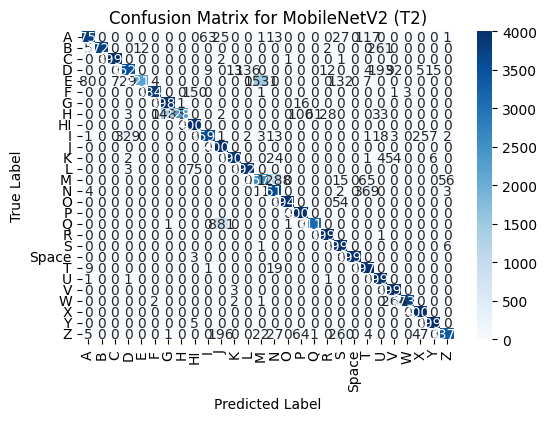

Classification Report for MobileNetV2 (T2):
              precision    recall  f1-score   support

           A       0.97      0.94      0.96      4000
           B       1.00      0.93      0.96      4000
           C       1.00      1.00      1.00      4000
           D       0.91      0.88      0.89      4000
           E       0.99      0.55      0.71      4000
           F       1.00      0.96      0.98      4000
           G       0.73      1.00      0.84      4000
           H       1.00      0.57      0.73      4000
          HI       0.94      1.00      0.97      4000
           I       0.98      0.90      0.94      4000
           J       0.78      1.00      0.88      4000
           K       1.00      0.98      0.99      4000
           L       0.97      0.98      0.97      4000
           M       0.62      0.64      0.63      4000
           N       0.72      0.90      0.80      4000
           O       1.00      0.99      0.99      4000
           P       0.96      1.00    

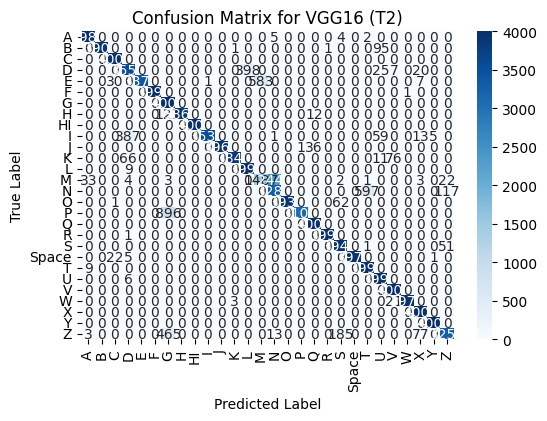

Classification Report for VGG16 (T2):
              precision    recall  f1-score   support

           A       0.99      1.00      0.99      4000
           B       1.00      0.98      0.99      4000
           C       0.99      1.00      0.99      4000
           D       0.88      0.89      0.88      4000
           E       1.00      0.84      0.92      4000
           F       1.00      1.00      1.00      4000
           G       0.73      1.00      0.84      4000
           H       1.00      0.97      0.98      4000
          HI       1.00      1.00      1.00      4000
           I       1.00      0.88      0.94      4000
           J       1.00      0.99      1.00      4000
           K       1.00      0.96      0.98      4000
           L       0.91      1.00      0.95      4000
           M       0.72      0.37      0.49      4000
           N       0.57      0.82      0.67      4000
           O       1.00      0.98      0.99      4000
           P       1.00      0.78      0.87

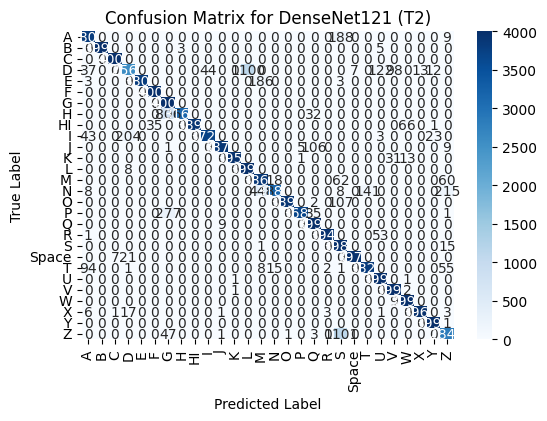

Classification Report for DenseNet121 (T2):
              precision    recall  f1-score   support

           A       0.95      0.95      0.95      4000
           B       1.00      1.00      1.00      4000
           C       1.00      1.00      1.00      4000
           D       0.91      0.64      0.75      4000
           E       1.00      0.95      0.98      4000
           F       0.99      1.00      1.00      4000
           G       0.78      1.00      0.88      4000
           H       1.00      0.79      0.88      4000
          HI       1.00      0.97      0.99      4000
           I       0.99      0.93      0.96      4000
           J       1.00      0.97      0.98      4000
           K       1.00      0.99      0.99      4000
           L       0.78      1.00      0.88      4000
           M       0.86      0.96      0.91      4000
           N       0.99      0.80      0.88      4000
           O       1.00      0.97      0.99      4000
           P       1.00      0.92    

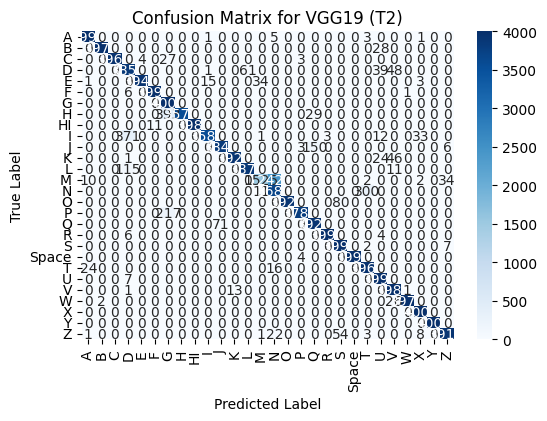

Classification Report for VGG19 (T2):
              precision    recall  f1-score   support

           A       0.99      1.00      0.99      4000
           B       1.00      0.99      1.00      4000
           C       1.00      0.99      1.00      4000
           D       0.88      0.96      0.92      4000
           E       1.00      0.99      0.99      4000
           F       1.00      1.00      1.00      4000
           G       0.86      1.00      0.93      4000
           H       1.00      0.89      0.94      4000
          HI       1.00      1.00      1.00      4000
           I       1.00      0.90      0.94      4000
           J       0.98      0.96      0.97      4000
           K       1.00      0.98      0.99      4000
           L       0.98      0.97      0.98      4000
           M       0.97      0.38      0.55      4000
           N       0.60      0.92      0.73      4000
           O       1.00      0.98      0.99      4000
           P       1.00      0.95      0.97

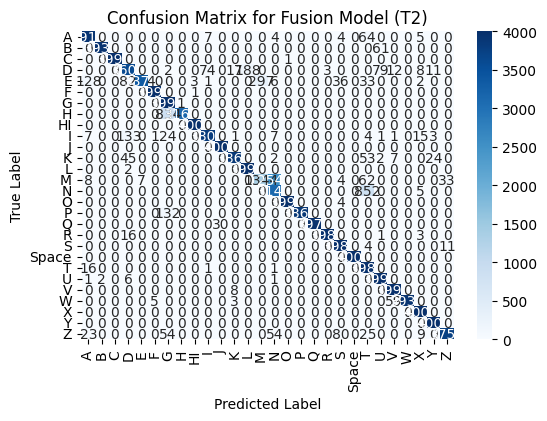

Classification Report for Fusion Model (T2):
              precision    recall  f1-score   support

           A       0.96      0.98      0.97      4000
           B       1.00      0.98      0.99      4000
           C       1.00      1.00      1.00      4000
           D       0.93      0.90      0.91      4000
           E       1.00      0.84      0.91      4000
           F       0.99      1.00      0.99      4000
           G       0.79      1.00      0.88      4000
           H       1.00      0.79      0.88      4000
          HI       1.00      1.00      1.00      4000
           I       0.98      0.95      0.96      4000
           J       0.99      1.00      1.00      4000
           K       0.99      0.97      0.98      4000
           L       0.96      1.00      0.98      4000
           M       0.82      0.34      0.48      4000
           N       0.55      0.79      0.64      4000
           O       1.00      1.00      1.00      4000
           P       1.00      0.97   

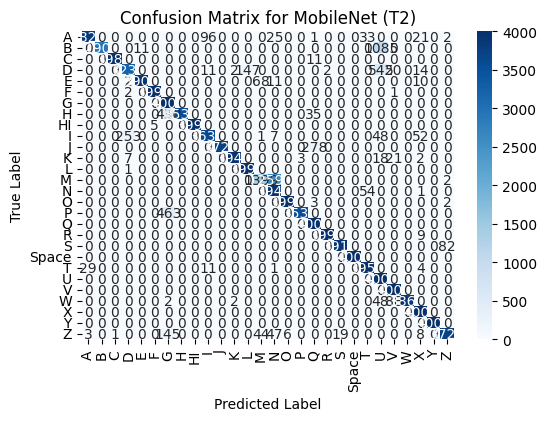

Classification Report for MobileNet (T2):
              precision    recall  f1-score   support

           A       0.99      0.96      0.97      4000
           B       1.00      0.73      0.84      4000
           C       1.00      1.00      1.00      4000
           D       0.92      0.81      0.86      4000
           E       1.00      0.98      0.99      4000
           F       1.00      1.00      1.00      4000
           G       0.79      1.00      0.88      4000
           H       1.00      0.88      0.94      4000
          HI       1.00      1.00      1.00      4000
           I       0.97      0.91      0.94      4000
           J       1.00      0.93      0.96      4000
           K       1.00      0.99      0.99      4000
           L       0.96      1.00      0.98      4000
           M       0.93      0.35      0.51      4000
           N       0.59      0.99      0.74      4000
           O       1.00      1.00      1.00      4000
           P       1.00      0.88      

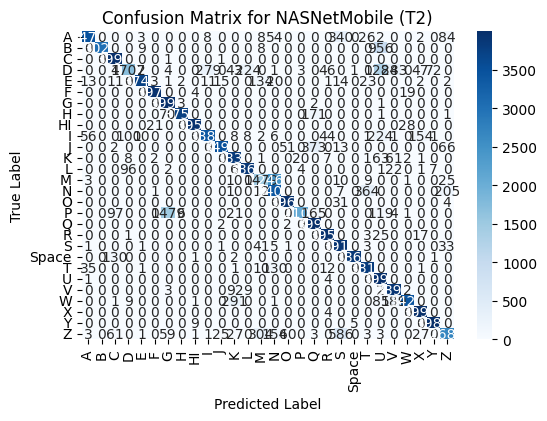

Classification Report for NASNetMobile (T2):
              precision    recall  f1-score   support

           A       0.97      0.87      0.92      4000
           B       1.00      0.76      0.86      4000
           C       0.93      1.00      0.96      4000
           D       0.89      0.43      0.58      4000
           E       0.99      0.94      0.96      4000
           F       0.99      0.99      0.99      4000
           G       0.71      1.00      0.83      4000
           H       1.00      0.94      0.97      4000
          HI       1.00      0.99      0.99      4000
           I       0.92      0.85      0.88      4000
           J       0.99      0.87      0.93      4000
           K       0.88      0.96      0.92      4000
           L       0.94      0.97      0.95      4000
           M       0.74      0.37      0.49      4000
           N       0.55      0.85      0.66      4000
           O       0.97      0.99      0.98      4000
           P       0.99      0.53   

In [11]:
# Dictionary to store metrics for each model
results = {}

for model_name, model_path in models_dict.items():
    print(f"\nEvaluating model: {model_name}")
    
    # Load the pre-trained model
    model = load_model(model_path)
    
    # Reset the generator so that predictions start from the beginning
    test_generator.reset()
    
    # Make predictions on the test set
    predictions = model.predict(test_generator, 
                                steps=int(np.ceil(test_generator.samples / batch_size)), 
                                verbose=1)
    
    # Determine predictions based on the output shape
    if predictions.shape[1] == 1:
        # For binary classification (sigmoid output)
        y_pred = (predictions > 0.5).astype("int32").reshape(-1)
    else:
        # For multi-class classification (softmax output)
        y_pred = np.argmax(predictions, axis=1)
    
    # Get true labels from the generator
    y_true = test_generator.classes
    
    # Compute confusion matrix and classification report
    cm = confusion_matrix(y_true, y_pred)
    cr = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    
    # Compute overall metrics
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    # Save results
    results[model_name] = {
        "confusion_matrix": cm,
        "classification_report": cr,
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    # Print classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))


#### Summary Table Comparing Models
This cell creates a summary table of key metrics for all the evaluated models.

In [12]:
# Create a summary list
summary_data = []
for model_name, metrics in results.items():
    summary_data.append({
        "Model": model_name,
        "Accuracy": metrics["accuracy"],
        "Precision": metrics["precision"],
        "Recall": metrics["recall"],
        "F1-Score": metrics["f1_score"]
    })

# Convert to DataFrame and sort by Accuracy
summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values(by="Accuracy", ascending=False)

print("\nSummary of Model Performances:")
display(summary_df)



Summary of Model Performances:


,Model,Accuracy,Precision,Recall,F1-Score
3,VGG19 (T2),0.956732,0.965232,0.956732,0.954627
2,DenseNet121 (T2),0.945696,0.952496,0.945696,0.945148
4,Fusion Model (T2),0.942875,0.950297,0.942875,0.940561
5,MobileNet (T2),0.937670,0.952075,0.937670,0.935726
1,VGG16 (T2),0.937268,0.943711,0.937268,0.935607
0,MobileNetV2 (T2),0.920045,0.930337,0.920045,0.918010
6,NASNetMobile (T2),0.881018,0.899970,0.881018,0.876607
